 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#The-Traveling-Salesperson-Problem" data-toc-modified-id="The-Traveling-Salesperson-Problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Traveling Salesperson Problem</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Data-Structures-and-DataTypes" data-toc-modified-id="Data-Structures-and-DataTypes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Structures and DataTypes</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Import-Packages" data-toc-modified-id="Import-Packages-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Representing-Tours" data-toc-modified-id="Representing-Tours-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Representing Tours</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Representing-Points-and-Computing-distance" data-toc-modified-id="Representing-Points-and-Computing-distance-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Representing Points and Computing distance</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Generate-Sets-of-Cities" data-toc-modified-id="Generate-Sets-of-Cities-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Generate Sets of Cities</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Plotting-Tours" data-toc-modified-id="Plotting-Tours-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Plotting Tours</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Genetic-Algorithm-Part" data-toc-modified-id="Genetic-Algorithm-Part-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Genetic Algorithm Part</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Individual-representation-and-evaluation" data-toc-modified-id="Individual-representation-and-evaluation-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Individual representation and evaluation</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Define-Crossover-and-mutation-operators" data-toc-modified-id="Define-Crossover-and-mutation-operators-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Define Crossover and mutation operators</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Fitness" data-toc-modified-id="Fitness-1.7.3"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Fitness</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Run-the-algorithm-with-a-populationof-100-individuals-and-500-generations" data-toc-modified-id="Run-the-algorithm-with-a-populationof-100-individuals-and-500-generations-1.7.4"><span class="toc-item-num">1.7.4&nbsp;&nbsp;</span>Run the algorithm with a populationof 100 individuals and 500 generations</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Specify-statistical-data-about-the-population-to-collect-during-the-evolution-procoess" data-toc-modified-id="Specify-statistical-data-about-the-population-to-collect-during-the-evolution-procoess-1.7.5"><span class="toc-item-num">1.7.5&nbsp;&nbsp;</span>Specify statistical data about the population to collect during the evolution procoess</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Review-the-results" data-toc-modified-id="Review-the-results-1.7.6"><span class="toc-item-num">1.7.6&nbsp;&nbsp;</span>Review the results</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Plotting-mean-and-minimium-fitness-as-evolution-took-place." data-toc-modified-id="Plotting-mean-and-minimium-fitness-as-evolution-took-place.-1.7.7"><span class="toc-item-num">1.7.7&nbsp;&nbsp;</span>Plotting mean and minimium fitness as evolution took place.</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Population-Evolution" data-toc-modified-id="Population-Evolution-1.7.8"><span class="toc-item-num">1.7.8&nbsp;&nbsp;</span>Population Evolution</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Plotting-The-individuals-and-their-fitness" data-toc-modified-id="Plotting-The-individuals-and-their-fitness-1.7.9"><span class="toc-item-num">1.7.9&nbsp;&nbsp;</span>Plotting The individuals and their fitness</a></span></li><li><span><a href="http://localhost:8888/notebooks/TSP.ipynb#Animate-Population-Evolution" data-toc-modified-id="Animate-Population-Evolution-1.7.10"><span class="toc-item-num">1.7.10&nbsp;&nbsp;</span>Animate Population Evolution</a></span></li></ul></li></ul></li></ul></div>

# The Traveling Salesperson Problem
Consider the [Traveling Salesperson Problem](http://en.wikipedia.org/wiki/Traveling_salesman_problem):
>Given a set of cities and the distances between each pair of cities, what is the shortest possible tour that visits each city exactly once, and returns to the starting city?

This notebook relies on [Peter Norvig](http://norvig.com/)'s [IPython notebook on the traveling salesperson problem](http://nbviewer.ipython.org/url/norvig.com/ipython/TSPv3.ipynb)

## Data Structures and DataTypes

- **A set of cities**: ---> ```Python's set```
- **Distance between each pair of cities**: ---> If A and B are cities, the distance between the two cities could be calculated through a function ```distance(A, B)```, or a table lookup, ```distance[A][B]```
- **City**: ---> a city could be represented by an integer ```(0, 1, 2, ..)``` used as an index into a distance table.
- **Tour**: ---> is a specified order in whichto visit the cities; Python's ```list``` or ```tuple``` datatypes work. For example, given the set of cities ```{A, B, C, D}```, a tour might be the list ```[B, A, D, C]```, which means to travel from B to A to D to C and finally back to B.
- **Shortest possible tour**: ---> the shortest tour is the one whose tour length is the minimum of all tours.
- **Tour length**: The sum of the distances between adjacent cities in the tour (including the last city back to the first city).
- **```shortest_path_finder()```**: ---> is the function that takes a set of cities as input and returns a tour as output. 

## Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import random, operator, time, itertools, math
import numpy as np

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

## Representing Tours

- A tour starts in one city, and then visits each of the other cities in order, before returning to the start city. A natural representation of a tour is a sequence of cities. For example (1, 2, 3) could represent a tour that starts in city 1, moves to 2, then 3, and finally returns to 1.

- Now for the alltours function. If a tour is a sequence of cities, then all the tours are permutations of the set of all cities. A function to generate all permutations of a set is already provided in Python's standard itertools library module; we can use it as our implementation of alltours:

In [2]:
# The permutation function is already defined in the itertools module
alltours = itertools.permutations

In [3]:
alltours

itertools.permutations

For $n$ cities there are $n!$ (that is, the factorial of n) permutations. Here's are all $3! = 6$ tours of 3 cities

In [4]:
cities = {'New-York', 'Little-Rock', 'Chicago'}

In [5]:
list(alltours(cities))

[('Chicago', 'Little-Rock', 'New-York'),
 ('Chicago', 'New-York', 'Little-Rock'),
 ('Little-Rock', 'Chicago', 'New-York'),
 ('Little-Rock', 'New-York', 'Chicago'),
 ('New-York', 'Chicago', 'Little-Rock'),
 ('New-York', 'Little-Rock', 'Chicago')]

## Representing Points and Computing distance
A city can be represented as just a two-dimensional point. But how will we represent points? Here are some choices, with their pros and cons:

- **tuple:** A point is a two-tuple of (x, y) coordinates, for example, (300, 0). 
    - Pro: Very simple. 
    - Con: doesn't distinguish Points from other two-tuples.
    
- **class:** Define a custom Point class with x and y slots. 
    - Pro: explicit, gives us p.x and p.y accessors. 
    - Con: less efficient.
    
- **complex:** Python already has the two-dimensional point as a built-in numeric data type, but in a non-obvious way: as complex numbers, which inhabit the two-dimensional (real × imaginary) plane. 
    - Pro: efficient. 
    - Con: a little confusing; doesn't distinguish Points from other complex numbers.
    
- **subclass of complex:** All the pros of complex, and eliminating the major con.

In [6]:
# Cities are represented as Points, which are a subclass of complex numbers

class Point(complex):
    x = property(lambda p: p.real)
    y = property(lambda p: p.imag)
    
City = Point


In [7]:
def distance(A, B):
    "Function to calculate the distance between two points"
    return abs(A - B)

In [8]:
# Example of computing the distance between two cities.
A = City(6, 0)
B = City(0, 8)

In [9]:
print("Distance between City A and City B is: {}".format(distance(A, B)))

Distance between City A and City B is: 10.0


In [10]:
def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

## Generate Sets of Cities 

- Create a function that makes a random set of n cities by calling City n times, each with different random x and y coordinates.

- Make ```Cities``` return a ```frozenset``` rather than a ```set```. A ```frozenset``` is immutable; nobody can change it once it is created. (Likewise, each city is immutable.)

In [11]:
def generate_cities(n, width=900, height=600, seed=1234):
    "Make a set of n cities, each with random coordinates within a (width x height) rectangle."
    random.seed(seed * n)
    return frozenset(City(random.randrange(width), random.randrange(height))
                     for c in range(n))

In [12]:
cities8, cities10, cities100, cities1000 = generate_cities(8), generate_cities(10), generate_cities(100), generate_cities(1000)
cities8

frozenset({(836+149j),
           (630+538j),
           (785+467j),
           (440+92j),
           (142+117j),
           (335+150j),
           (510+392j),
           (26+353j)})

## Plotting Tours

In [13]:
def plot_tour(tour, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], style='gD', alpha=alpha, size=10)
    # plt.show()
    
def plotline(points, style='bo-', alpha=1, size=7, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, markersize=size, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha, markersize=size)
    
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

## Genetic Algorithm Part

The [DEAP](https://github.com/DEAP/deap) library is used to tackle this problem using a genetic algorithm.
![](https://camo.githubusercontent.com/c421a85cd3838a04b535b7787038cc957514f031/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f444541502f646561702f6d61737465722f646f632f5f7374617469632f646561705f6c6f6e672e706e67)

In [14]:
from deap import algorithms, base, creator, tools

In [15]:
num_cities = 30
cities = generate_cities(num_cities)

The toolbox stores the setup of the algorithm. It describes the different elements to take into account.

In [16]:
toolbox = base.Toolbox()

### Individual representation and evaluation
- Individuals represent possible solutions to the problem.
- In the TSP case, it looks like the tour itself can be a suitable representation.
- For simplicity, an individual can be a list with the indexes corresponding to each city.
- This will simplify the crossover and mutation operators.
- We can rely on the total_distance() function for evaluation and set the fitness assignment as to minimize it.

In [17]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

Define that our individuals are composed by indexes that refer to elements of cities and, correspondingly, the population is composed by individuals.

In [18]:
toolbox.register("indices", np.random.permutation, len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual,
                toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                toolbox.individual)

### Define Crossover and mutation operators

In [19]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

### Fitness
Fitness evaluation can be easily defined from the ```total_distance()``` definition.

In [20]:
def create_tour(individual):
    return [list(cities)[e] for e in individual]

def evaluation(individual):
    '''Evaluates an individual by converting it into 
    a list of cities and passing that list to total_distance'''
    return (total_distance(create_tour(individual)),)

In [21]:
toolbox.register("evaluate", evaluation)

In [32]:
# Use tournament selection with size 3
toolbox.register("select", tools.selTournament, tournsize=3)

### Run the algorithm with a populationof 100 individuals and 500 generations

In [33]:
pop = toolbox.population(n=100)

### Specify statistical data about the population to collect during the evolution procoess

In [34]:
fit_stats = tools.Statistics(key=operator.attrgetter("fitness.values"))
fit_stats.register('mean', np.mean)
fit_stats.register('min', np.min)

In [35]:
%%time 
result, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2,
                                  ngen=500, verbose=False, stats=fit_stats)

CPU times: user 8.58 s, sys: 16 ms, total: 8.6 s
Wall time: 8.6 s


### Review the results

In [36]:
best_individual = tools.selBest(result, k=1)[0]
print('Fitness of the best individual: ', evaluation(best_individual)[0])

Fitness of the best individual:  3243.9746749685364


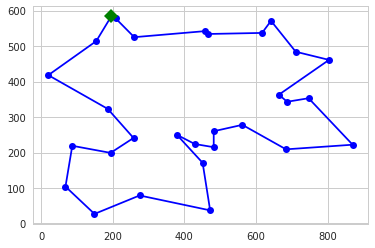

In [37]:
plot_tour(create_tour(best_individual))

### Plotting mean and minimium fitness as evolution took place.

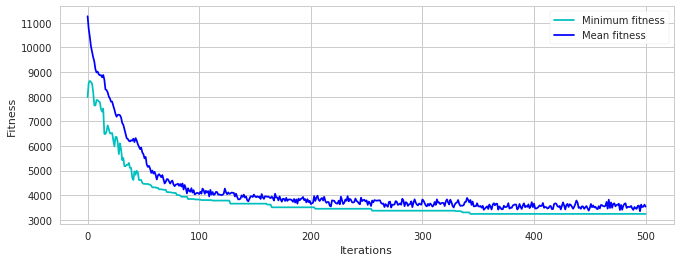

In [38]:
plt.figure(figsize=(11, 4))
plots = plt.plot(log.select('min'),'c-', log.select('mean'), 'b-')
plt.legend(plots, ('Minimum fitness', 'Mean fitness'), frameon=True)
plt.ylabel('Fitness'); plt.xlabel('Iterations');

### Population Evolution

In [39]:
pop_stats = tools.Statistics(key=np.copy)
pop_stats.register('pop', np.copy) # -- copies the populations themselves
pop_stats.register('fitness', # -- computes and stores the fitnesses
                   lambda x : [evaluation(a) for a in x])

In [41]:
%%time
result, log = algorithms.eaSimple(pop, toolbox,
                                  cxpb=0.8, mutpb=0.2,
                                  ngen=500, verbose=False,
                                  stats=pop_stats)

CPU times: user 10.8 s, sys: 12 ms, total: 10.8 s
Wall time: 10.8 s


### Plotting The individuals and their fitness

In [42]:
def plot_population(record, min_fitness, max_fitness):
    '''
    Plots all individuals in a population. 
    Darker individuals have a better fitness.
    '''
    pop = record['pop']
    fits = record['fitness']
    index = sorted(range(len(fits)), key=lambda k: fits[k])

    norm=colors.Normalize(vmin=min_fitness,
                          vmax=max_fitness)
    sm = cmx.ScalarMappable(norm=norm, 
                            cmap=plt.get_cmap('PuBu'))
    
    for i in range(len(index)):
        color = sm.to_rgba(max_fitness - fits[index[i]][0])
        plot_tour(create_tour(pop[index[i]]), alpha=0.5, color=color)

In [43]:
min_fitness = np.min(log.select('fitness'))
max_fitness = np.max(log.select('fitness'))

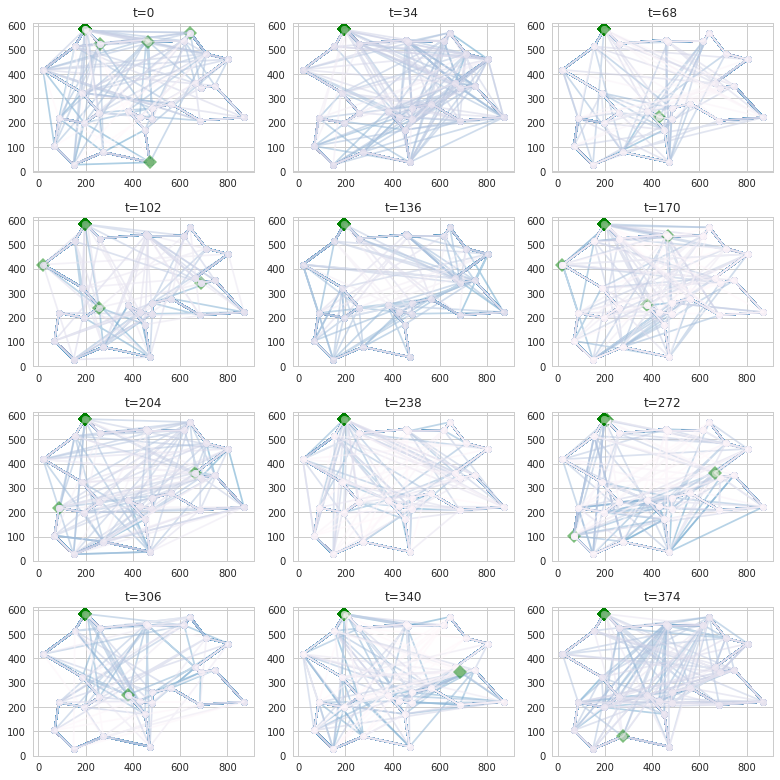

In [44]:
plt.figure(figsize=(11,11))
for i in range(0, 12):
    plt.subplot(4,3,i+1)
    it = int(math.ceil((len(log)-1.)/15))
    plt.title('t=' + str(it*i))
    plot_population(log[it*i], min_fitness, max_fitness)
plt.tight_layout()

### Animate Population Evolution

In [45]:
from matplotlib import animation
from IPython.display import HTML

In [46]:
def update_plot_tour(plot, points, alpha=1, color='blue'):
    'A function for updating a plot with an individual'
    X, Y = XY(list(points) + [points[0]])
    plot.set_data(X, Y)
    plot.set_color(color)
    return plot

In [47]:
def init():
    'Initialization of all plots to empty data'
    for p in list(tour_plots):
        p.set_data([], [])
    return tour_plots

In [51]:
def animate(i):
    'Updates all plots to match frame _i_ of the animation' 
    pop = log[i]['pop']
    fits = log[i]['fitness']
    index = sorted(range(len(fits)), key=lambda k: fits[k])

    norm=colors.Normalize(vmin=min_fitness,
                          vmax=max_fitness)
    sm = cmx.ScalarMappable(norm=norm, 
                            cmap=plt.get_cmap('viridis'))
    for j in range(len(tour_plots)):
        color = sm.to_rgba(max_fitness - fits[index[j]][0])
        update_plot_tour(tour_plots[j], 
                         create_tour(pop[index[j]]), 
                         alpha=0.5, color=color)
    return tour_plots

In [52]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 900), ylim=(0, 600))
tour_plots = [ax.plot([], [], 'bo-', alpha=0.1) for i in range(len(log[0]['pop']))]
tour_plots = [p[0] for p in tour_plots]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=60, blit=True)
plt.close()

In [53]:
HTML(anim.to_html5_video())

In [54]:
%load_ext version_information
%version_information scipy, numpy, matplotlib, seaborn, deap

Software versions
Python 3.6.2 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.1.0
OS Linux 4.4.0 53 generic x86_64 with debian stretch sid
scipy 0.19.1
numpy 1.12.1
matplotlib 2.0.2
seaborn 0.8.0
deap 1.0
Wed Sep 06 22:34:33 2017 CDT